#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and view

In [3]:
data = pd.read_csv('/content/Warehouse_and_Retail_Sales.csv')
data.head(10)
#displaying the top 10 rows of dataset

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0.0,6.0
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.08,1.0,1.0
7,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,BEER,0.00,0.0,2.0
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6.41,4.0,0.0
9,2020,1,INTERNATIONAL CELLARS LLC,101117,KSARA CAB - 750ML,WINE,0.33,1.0,2.0


# Data Exploration

In [4]:
# Check the shape of the dataset (Rows, Columns)
print("shape of the dataset;", data.shape)

shape of the dataset; (307645, 9)


In [5]:
# Check the data types of each column to ensure they are appropriate.
print(data.dtypes)

YEAR                  int64
MONTH                 int64
SUPPLIER             object
ITEM CODE            object
ITEM DESCRIPTION     object
ITEM TYPE            object
RETAIL SALES        float64
RETAIL TRANSFERS    float64
WAREHOUSE SALES     float64
dtype: object


We are going to change the data type of month column into str e.g.(Jan, Feb)

In [6]:
# step 1: Create a mapping dictionary
month_mapping = {
    1: 'Jan',
    2:'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6:'Jun',
    7: 'jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

In [7]:
# Step 2: Replace month abbreviations with corresponding integers # (It's Kind of Look up function in Excel)
data['MONTH'] = data['MONTH'].replace(month_mapping)
# Check the updated data types
print(data['MONTH'].dtypes)
print(data.head())

object
   YEAR MONTH                           SUPPLIER ITEM CODE  \
0  2020   Jan  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020   Jan                          PWSWN INC    100024   
2  2020   Jan            RELIABLE CHURCHILL LLLP      1001   
3  2020   Jan          LANTERNA DISTRIBUTORS INC    100145   
4  2020   Jan               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4               0.0         

In [8]:
# Get a summary of the dataset to understand the distribution of numerical features.
print(data.describe())

                YEAR   RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
count  307645.000000  307642.000000     307645.000000    307645.000000
mean     2018.438525       7.024071          6.936465        25.294597
std         1.083061      30.986238         30.237195       249.916798
min      2017.000000      -6.490000        -38.490000     -7800.000000
25%      2017.000000       0.000000          0.000000         0.000000
50%      2019.000000       0.320000          0.000000         1.000000
75%      2019.000000       3.267500          3.000000         5.000000
max      2020.000000    2739.000000       1990.830000     18317.000000


#Data Cleaning Part:-
As we can see in the count of all column there are some disrepncy in the count of all column are mistach that means there are null value in the dataset

In [9]:
# finding missing values in each column
print(data.isnull().sum())

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64


In [10]:
# Handling the missing values:- In our dataset we are going to remove the null values contain rows
data = data.dropna()
data.shape

(307477, 9)

In [11]:
# finding and remvoing the duplicates
duplicates = data.duplicated()
print(duplicates.sum())

# In our dataet there isn't any duplicate available if exits then we will remove that by below code
data.drop_duplicates(inplace=True)
data.shape

0


(307477, 9)

#Exploratory Data Analysis (EDA):

By using visualizations and summary statistics to explore the data further. This helps in understanding patterns, trends, and relationships within the data.

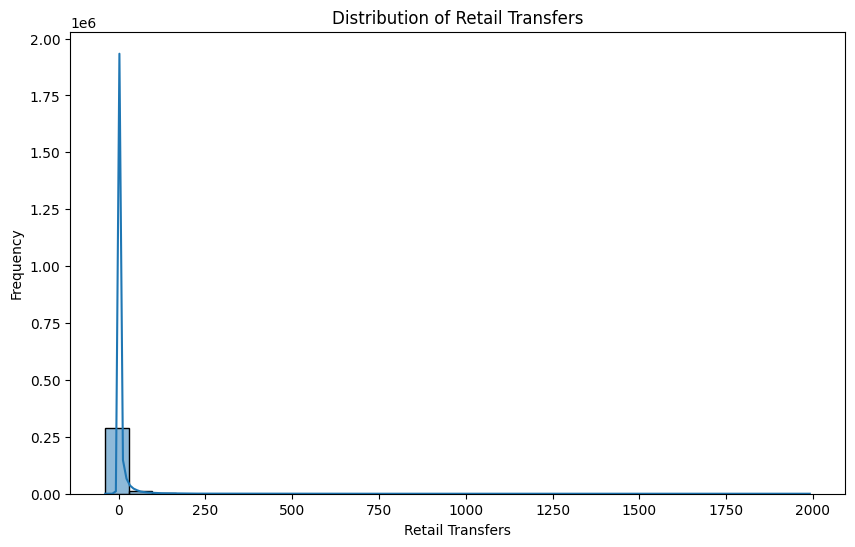

In [12]:
#Create a histogram for RETAIL TRANSFERS
plt.figure(figsize=(10, 6))
sns.histplot(data['RETAIL TRANSFERS'], bins = 30, kde = True)
plt.title('Distribution of Retail Transfers')
plt.xlabel('Retail Transfers')
plt.ylabel('Frequency')
plt.show()

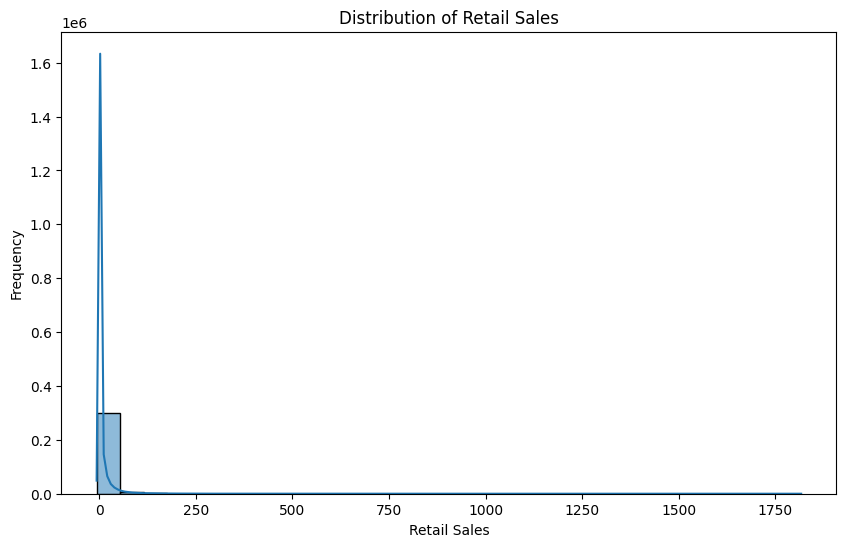

In [13]:
#Create a histogram for RETAIL SALES
plt.figure(figsize=(10, 6))
sns.histplot(data['RETAIL SALES'], bins=30, kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Retail Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Frequency')
plt.show()

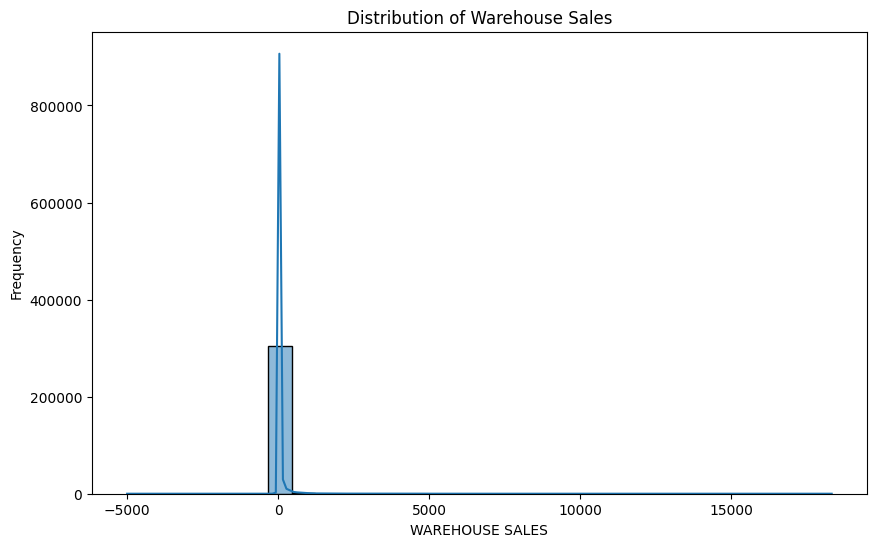

In [14]:
#Create a histogram for WAREHOUSE SALES
plt.figure(figsize=(10, 6))
sns.histplot(data['WAREHOUSE SALES'], bins=30, kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Warehouse Sales')
plt.xlabel('WAREHOUSE SALES')
plt.ylabel('Frequency')
plt.show()

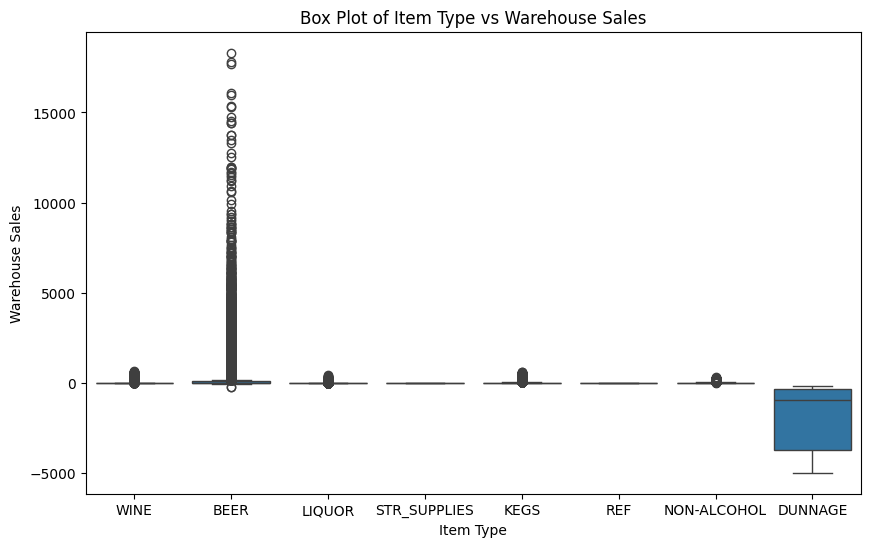

In [15]:
#Box Plots: To identify outliers and understand the spread of the data.

plt.figure(figsize=(10, 6))
sns.boxplot(x='ITEM TYPE', y='WAREHOUSE SALES', data=data)  # Replace with your column names
plt.title('Box Plot of Item Type vs Warehouse Sales')
plt.xlabel('Item Type')
plt.ylabel('Warehouse Sales')
plt.show()

#Observations:
BEER:

Has extremely high sales outliers compared to other categories.

The median and IQR (interquartile range) are quite low, but there are many extreme positive outliers (values > 10,000).

Suggests high variability and possibly some extreme sale transactions.

DUNNAGE:

Unique in having a large spread into negative sales.

Median appears to be negative, and the entire box lies in the negative region, suggesting this category may involve returns, adjustments, or losses.

Other Categories (WINE, LIQUOR, STR_SUPPLIES, KEGS, REF, NON-ALCOHOL):

Appear tightly packed around 0.

Limited variability, low median sales, and almost no outliers.

In [16]:
print(data.columns)

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')


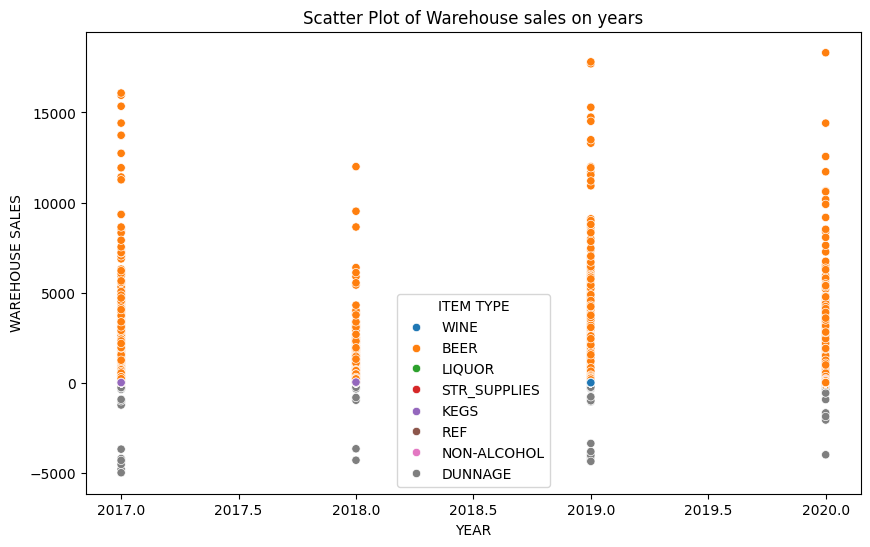

In [17]:
# Example: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YEAR', y='WAREHOUSE SALES', hue ='ITEM TYPE',  data=data)
plt.title('Scatter Plot of Warehouse sales on years')
plt.show()

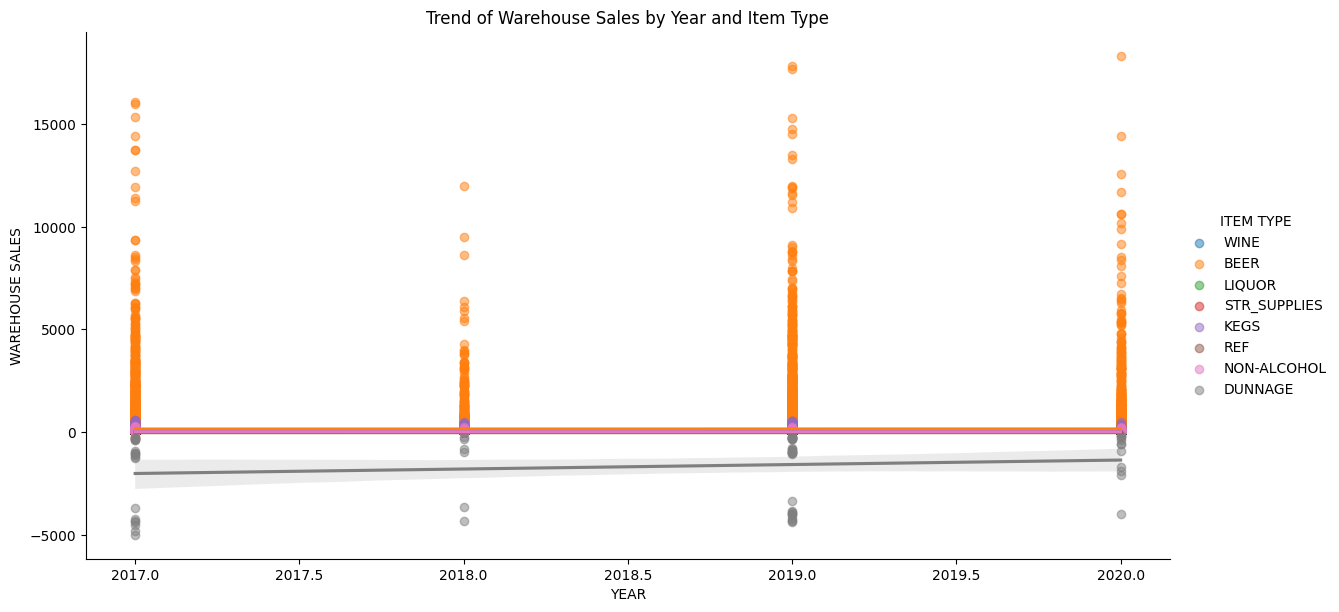

In [18]:
#Trend Line (with Regression Fit)
sns.lmplot(x='YEAR', y='WAREHOUSE SALES', data=data, hue='ITEM TYPE', aspect=2, height=6, scatter_kws={'alpha':0.5})
plt.title('Trend of Warehouse Sales by Year and Item Type')
plt.show()